### Clustering and dimensionality reduction

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("wine.csv")
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


**Clustering for wine colour**

In [2]:
features = df.iloc[:, :-2]
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [3]:
km = KMeans(n_clusters=2, random_state=42)
km_labels = km.fit_predict(features)
sil_baseline = silhouette_score(features, km_labels)
print(f'Silhouette Score - Original Features: {sil_baseline}')

Silhouette Score - Original Features: 0.2764785769202074


In [4]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)
km_pca = KMeans(n_clusters=2, random_state=42)
km_pca_labels = km_pca.fit_predict(features_pca)
sil_pca = silhouette_score(features_pca, km_pca_labels)
print(f'Silhouette Score - PCA Features: {sil_pca}')

Silhouette Score - PCA Features: 0.46313927610200334


In [5]:
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features)
km_tsne = KMeans(n_clusters=2, random_state=42)
km_tsne_labels = km_tsne.fit_predict(features_tsne)
sil_tsne = silhouette_score(features_tsne, km_tsne_labels)
print(f'Silhouette Score - t-SNE Features: {sil_tsne}')

Silhouette Score - t-SNE Features: 0.3561696410179138


Silhouette Score - Original Features: 0.2764785769202074
Silhouette Score - PCA Features: 0.46313927610200334
Silhouette Score - t-SNE Features: 0.3561696410179138


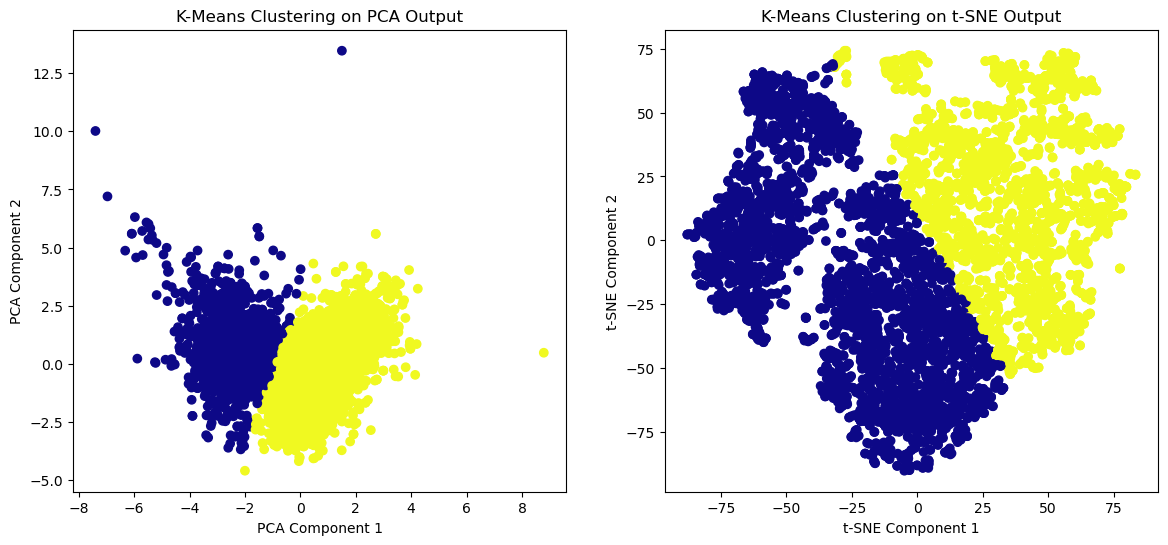

In [6]:
print(f'Silhouette Score - Original Features: {sil_baseline}')
print(f'Silhouette Score - PCA Features: {sil_pca}')
print(f'Silhouette Score - t-SNE Features: {sil_tsne}')

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(features_pca[:, 0], features_pca[:, 1], c=km_pca_labels, cmap='plasma')
ax[0].set_title('K-Means Clustering on PCA Output')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')

ax[1].scatter(features_tsne[:, 0], features_tsne[:, 1], c=km_tsne_labels, cmap='plasma')
ax[1].set_title('K-Means Clustering on t-SNE Output')
ax[1].set_xlabel('t-SNE Component 1')
ax[1].set_ylabel('t-SNE Component 2')

plt.show()

Based on the plots, compactness of clusters after PCA is higher than that after t-SNE, and the clusters formed in either case are not much separated from each other, which gives PCA the advantage. This is also reflected by the Silhouette Score, which is higher for PCA.

**Clustering for wine quality**

In [7]:
features = df.iloc[:, :-2]
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [8]:
km = KMeans(n_clusters=10, random_state=42)
km_labels = km.fit_predict(features)
sil_baseline = silhouette_score(features, km_labels)
print(f'Silhouette Score - Original Features: {sil_baseline}')

Silhouette Score - Original Features: 0.14492612500180016


In [9]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)
km_pca = KMeans(n_clusters=10, random_state=42)
km_pca_labels = km_pca.fit_predict(features_pca)
sil_pca = silhouette_score(features_pca, km_pca_labels)
print(f'Silhouette Score - PCA Features: {sil_pca}')

Silhouette Score - PCA Features: 0.34392644480933904


In [10]:
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features)
km_tsne = KMeans(n_clusters=10, random_state=42)
km_tsne_labels = km_tsne.fit_predict(features_tsne)
sil_tsne = silhouette_score(features_tsne, km_tsne_labels)
print(f'Silhouette Score - t-SNE Features: {sil_tsne}')

Silhouette Score - t-SNE Features: 0.3971549868583679


Silhouette Score - Original Features: 0.14492612500180016
Silhouette Score - PCA Features: 0.34392644480933904
Silhouette Score - t-SNE Features: 0.3971549868583679


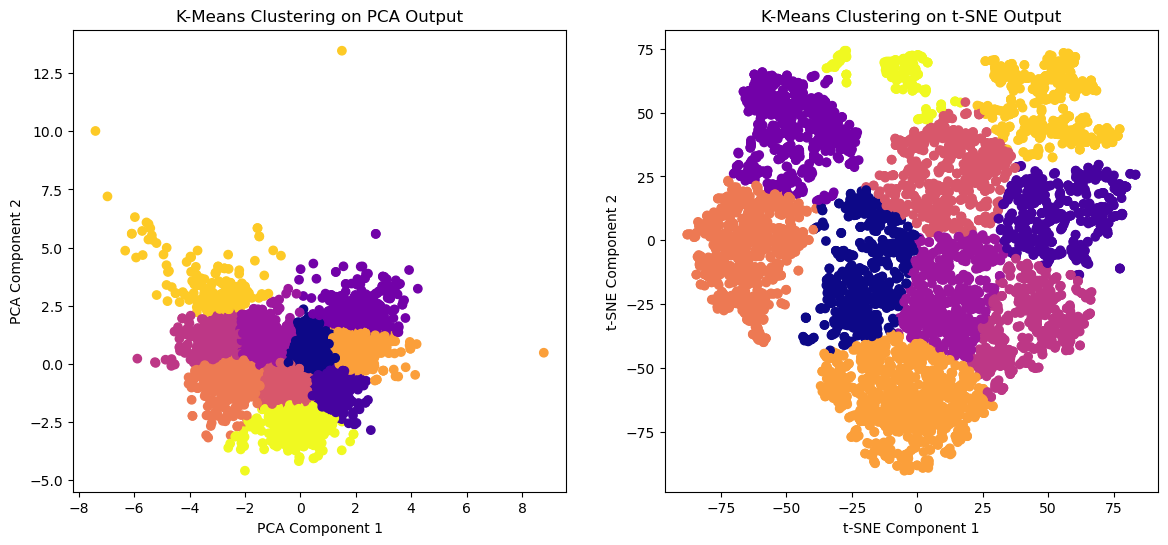

In [11]:
print(f'Silhouette Score - Original Features: {sil_baseline}')
print(f'Silhouette Score - PCA Features: {sil_pca}')
print(f'Silhouette Score - t-SNE Features: {sil_tsne}')

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(features_pca[:, 0], features_pca[:, 1], c=km_pca_labels, cmap='plasma')
ax[0].set_title('K-Means Clustering on PCA Output')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')

ax[1].scatter(features_tsne[:, 0], features_tsne[:, 1], c=km_tsne_labels, cmap='plasma')
ax[1].set_title('K-Means Clustering on t-SNE Output')
ax[1].set_xlabel('t-SNE Component 1')
ax[1].set_ylabel('t-SNE Component 2')

plt.show()

This time, the compactness of clusters in after PCA is again higher compared to t-SNE, but the separation among clusters is higher post t-SNE. This is why their Silhouette Scores are very close to each other.